### Figure 2.5(a)

Data is generated from a GP with hyperparameters $(l,\sigma_f,\sigma_n)=(1,1,0.1)$ as shown by the + symbols.

In [1]:
import numpy as np

X_test = np.linspace(start=-7, stop=7, num=100)[:,np.newaxis]
X_test.shape

(100, 1)

In [2]:
rng = np.random.default_rng(seed=18)
train_indices = rng.choice(np.arange(100), size=20, replace=False)
X_train = X_test[train_indices]
y_train = (X_train * np.sin(X_train)).squeeze()

X_train.shape, y_train.shape

((20, 1), (20,))

In [3]:
import matplotlib.pyplot as plt

def plot_generated_data(X_train, y_train, X_test, mean_pred, std_pred):
    _, ax = plt.subplots()
    ax.fill_between(
        X_test.squeeze(),
        mean_pred - 1.96 * std_pred,
        mean_pred + 1.96 * std_pred,
        color="gray", alpha=0.25, label="95% confidence interval"
    )
    ax.scatter(X_train, y_train, s=100, marker="+", label="Observations")
    ax.plot(X_test, mean_pred, label="Mean prediction")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_xlim(xmin=-7, xmax=7)
    ax.set_ylim(ymin=-5, ymax=5)
    ax.legend()

1**2 * RBF(length_scale=1) + 0.1**2 * WhiteKernel(noise_level=1)

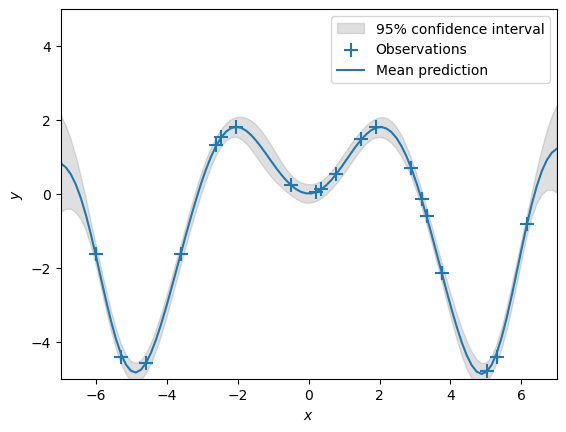

In [4]:
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel
from sklearn.gaussian_process import GaussianProcessRegressor

sigma_f, sigma_n = 1, 0.1

kernel = ConstantKernel(sigma_f**2, constant_value_bounds="fixed") * RBF(length_scale=1, length_scale_bounds="fixed") + \
    ConstantKernel(sigma_n**2, constant_value_bounds="fixed") * WhiteKernel(noise_level=1, noise_level_bounds="fixed")
gaussian_process = GaussianProcessRegressor(kernel).fit(
    X_train, y_train
)
mean_pred, std_pred = gaussian_process.predict(
    X_test, return_std=True
)
plot_generated_data(X_train, y_train, X_test, mean_pred, std_pred)
gaussian_process.kernel_

### Figure 2.5(b)

Shows the 95% confidence region for hyperparameter value (0.3, 1.08, 0.00005).

1.08**2 * RBF(length_scale=0.3) + 5e-05**2 * WhiteKernel(noise_level=1)

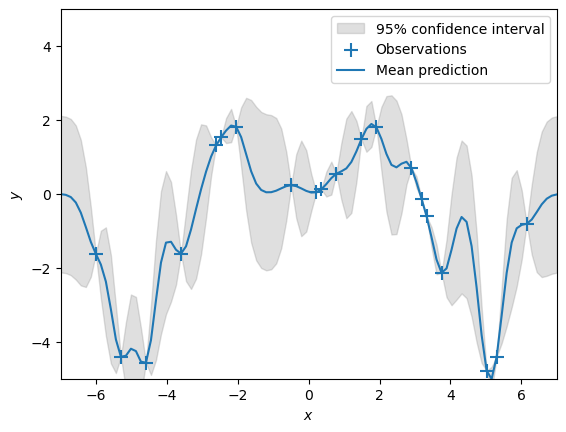

In [5]:
sigma_f, sigma_n = 1.08, 0.00005

kernel = ConstantKernel(sigma_f**2, constant_value_bounds="fixed") * RBF(length_scale=0.3, length_scale_bounds="fixed") + \
    ConstantKernel(sigma_n**2, constant_value_bounds="fixed") * WhiteKernel(noise_level=1, noise_level_bounds="fixed")
gaussian_process = GaussianProcessRegressor(kernel).fit(
    X_train, y_train
)
mean_pred, std_pred = gaussian_process.predict(
    X_test, return_std=True
)
plot_generated_data(X_train, y_train, X_test, mean_pred, std_pred)
gaussian_process.kernel_

### Figure 2.5(c)

Shows the 95% confidence region for hyperparameter value (3.0, 1.16, 0.89).

1.16**2 * RBF(length_scale=3) + 0.89**2 * WhiteKernel(noise_level=1)

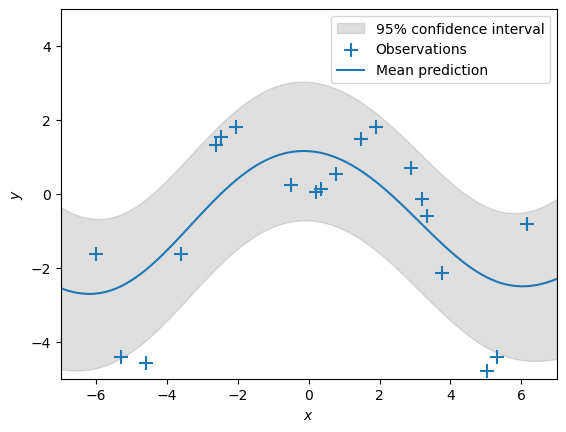

In [6]:
sigma_f, sigma_n = 1.16, 0.89

kernel = ConstantKernel(sigma_f**2, constant_value_bounds="fixed") * RBF(length_scale=3.0, length_scale_bounds="fixed") + \
    ConstantKernel(sigma_n**2, constant_value_bounds="fixed") * WhiteKernel(noise_level=1, noise_level_bounds="fixed")
gaussian_process = GaussianProcessRegressor(kernel).fit(
    X_train, y_train
)
mean_pred, std_pred = gaussian_process.predict(
    X_test, return_std=True
)
plot_generated_data(X_train, y_train, X_test, mean_pred, std_pred)
gaussian_process.kernel_